In [15]:
import pandas as pd
import random
from IPython.display import Image, display

def open_char_feats(path):
    characters = pd.read_csv(path)
    characters = characters.fillna("N")
    characters = characters.set_index("Name")
    return characters

def create_questions(characters):
    #Create questions about the features based on how they will be written
    features = list(characters.columns)
    q_type_1 = "Is your character "
    q_type_2 = "Does your character have "
    q_type_3 = "Does your character have a "
    list_type_1 = [0,5,6,7,10,14]
    list_type_2 = [1,8,9,13]
    list_type_3 = [2,3,4,11,12]

    list_types = [list_type_1, list_type_2, list_type_3]
    list_q_types = [q_type_1, q_type_2, q_type_3]
    questions_original = []
    for i, list_q in enumerate(list_types):
        for idx in list_q:
            question = list_q_types[i] + str(features[idx] + "? ")
            questions_original.append((question, features[idx]))
    return questions_original

def game(path_image, path_csv):
    #show image
    display(Image(filename=path_image) )
    characters_original = open_char_feats(path_csv)
    questions_original = create_questions(characters_original)
    
    #restart the characters and question in case game is played again
    characters = characters_original.copy()
    questions = questions_original.copy()
    questions_df = pd.DataFrame(questions)

    for i in range(15):
        if len(characters) ==0:
            print("Are you cheating?, There are NO character with that description!!!")
            break
        elif len(characters) ==1:
            print("Your character is:", list(characters.index)[0])
            break
        elif len(characters) !=1:
            #print("remaining options:", list(characters.index))
            try:
                # Chose a random question
                random_idx = random.randint(0, len(questions_df)) 
                # Ask question and validate answer to N or Y
                feat  = None
                while feat not in ['Y', 'N']:
                    feat = str(input(questions_df.iloc[random_idx,0]))   
                    if feat not in ['Y', 'N']:
                        print ("Please Enter (Y/N) ")
                # Eliminate characters based on this answer
                characters = characters[characters[questions_df.iloc[random_idx,1]]== feat]
                #Drop feat columns with all N 
                characters = characters.loc[:, ~(characters == 'N').all()]
                # Drop the question just asked
                questions_df = questions_df.drop(index = random_idx)
                # Drop the questions that are redundant (ie, no remainigncharacter has those qualities)
                questions_df = questions_df[questions_df[1].isin(characters.columns)]
                
                # reset indexes
                questions_df =  questions_df.reset_index(drop = True)

            except:
                pass
                 
def play_game():
    answer =  "Y"
    while answer == "Y":
        game(path_image, path_csv)
        answer = str(input("Want to play again? "))
    print("Thanks for playing. See you soon")


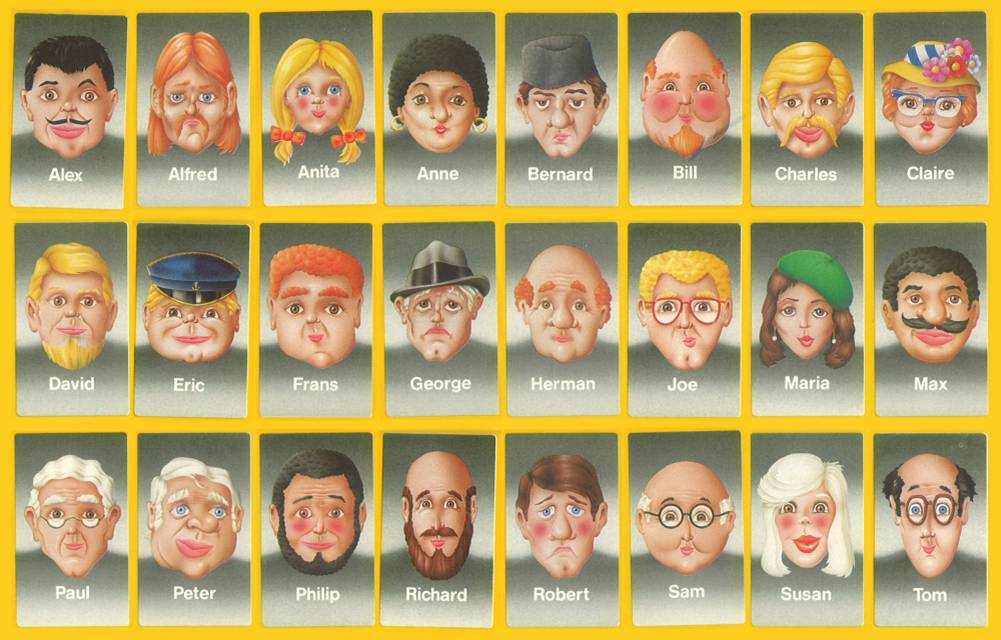

Does your character have black hair? Y
Does your character have glasses? N
Does your character have a beard? Y
Your character is: Philip
Want to play again? Y


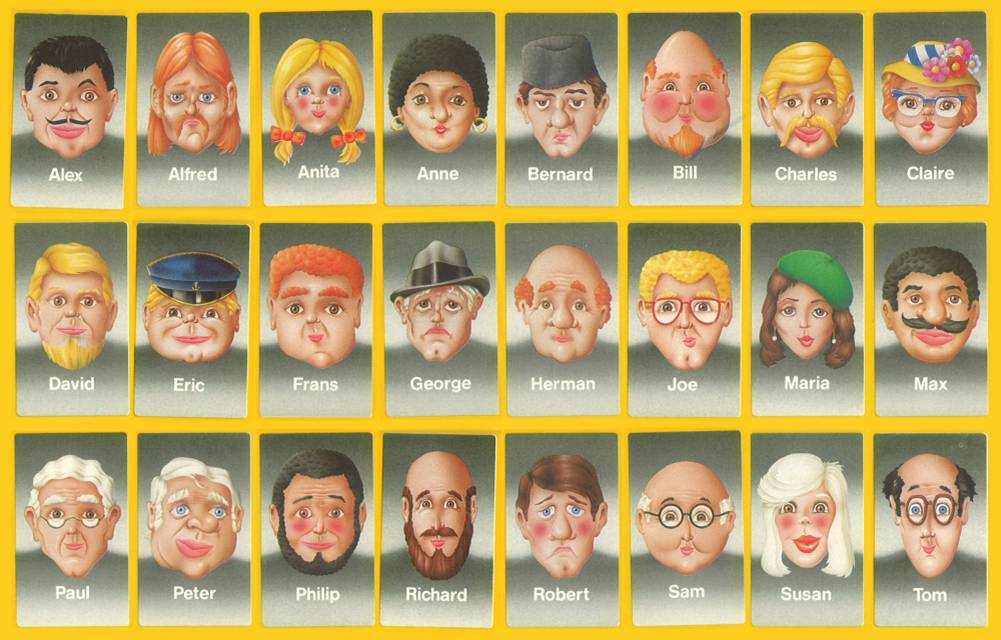

Is your character female? Y
Is your character flushed? Y
Is your character blonde? Y
Your character is: Anita


In [ ]:
path_image = "D:/guess who/guesswho.jpg"
path_csv = "D:/guess who/guess_who.csv"
play_game()